In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  f1_score, auc, precision_recall_curve, recall_score , precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df_base_titanic = pd.read_csv('train.csv')
df_base_test =pd.read_csv('test.csv')
df_base_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_base_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Exploring the dataset

In [7]:
print(df_base_titanic.shape[0] , 'X' , df_base_titanic.shape[1])

8693 X 14


The dataset have 8693 rows and 14 columns 

In [8]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


We noticed several categorical features, mainly referring to services, which can be transformed into dummies, in order to analyze the impact of the passenger having used the service in the fact of having been teleported or not.

In [9]:
df_base_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Some features only show values ​​in the last quartile.
It would also be interesting to do the same analysis with categorical features like dummies

### Analyze how much of the base is missing values

In [10]:
df_base_titanic.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
# improving this insight, let's analyze how much missing data represents each feature
nan_ratio = []
for col in df_base_titanic.columns :
    nan_item = []
    nan_item.append(col)
    nan_item.append(df_base_titanic[col].isnull().sum())
    nan_item.append(str(round(100*df_base_titanic[col].isnull().sum() / df_base_titanic.shape[0], 2 ))+ '%')
    nan_ratio.append(nan_item)
    
df_nan = pd.DataFrame(nan_ratio, columns=["Column", "NaN count", "NaN ratio"]).set_index("Column")
df_nan = df_nan.sort_values("NaN ratio", ascending=False)
df_nan.astype(object).T

Column,CryoSleep,ShoppingMall,VIP,HomePlanet,Name,Cabin,VRDeck,FoodCourt,Spa,Destination,RoomService,Age,PassengerId,Transported
NaN count,217,208,203,201,200,199,188,183,183,182,181,179,0,0
NaN ratio,2.5%,2.39%,2.34%,2.31%,2.3%,2.29%,2.16%,2.11%,2.11%,2.09%,2.08%,2.06%,0.0%,0.0%


Features have about 2.5% of the data as NaN , which is a low percentage

Only the PassengerID and Transported features do not have any Na

### Analyze if the base is unbalanced

In [12]:
df_base_titanic['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

The percentage of transported and not transported is almost equal. So we don't have an imbalance problem here

In [13]:
df_base_titanic['Transported'] = np.where(df_base_titanic['Transported'] == True, 1, 0)

### Analyze features and handle missing data

#1 HomePlanet

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

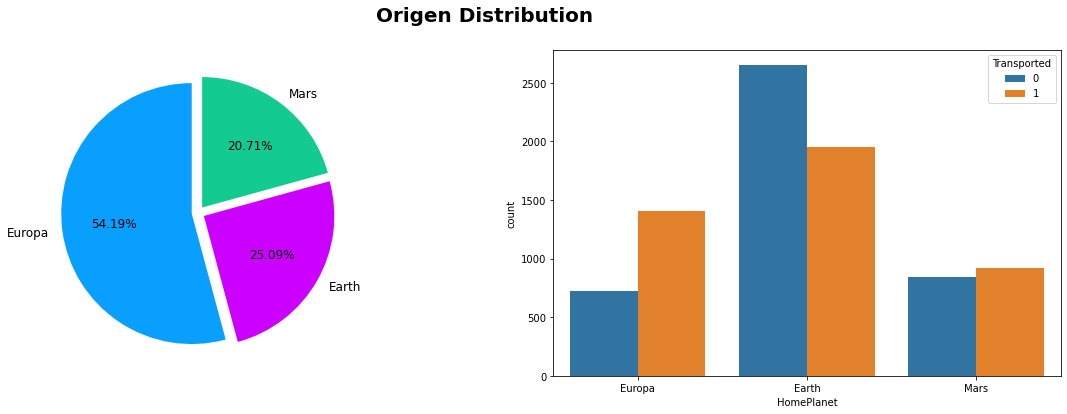

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Origen Distribution', size = 20, weight='bold')

sizes = (df_base_titanic['HomePlanet'].value_counts(sort=False))

labels = df_base_titanic['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=df_base_titanic, hue='Transported', ax=ax[1])

As we verified above that there are few missing values ​​in each feature (approximately 2.5%), in categorical variables we will use to fill these data with the most frequent data.
For this we will use Sklearn's SimpleImputer function, with the parameter strategy='most_frequent'

In [15]:
most_imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'most_frequent')

In [16]:
df_base_titanic.HomePlanet = most_imputer.fit_transform(df_base_titanic[['HomePlanet']])
df_base_test.HomePlanet = most_imputer.fit_transform(df_base_test[['HomePlanet']]) 

#2 CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

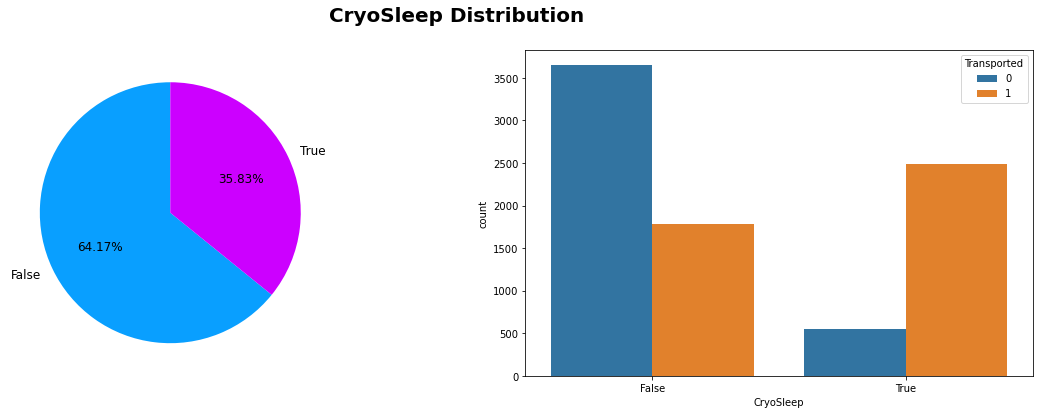

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('CryoSleep Distribution', size = 20, weight='bold')

sizes = (df_base_titanic['CryoSleep'].value_counts())

labels = df_base_titanic['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']

ax[0].pie(sizes, colors=colors,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='CryoSleep', data=df_base_titanic, hue='Transported', ax=ax[1])

In [18]:
df_base_titanic.CryoSleep = most_imputer.fit_transform(df_base_titanic[['CryoSleep']])
df_base_test.CryoSleep = most_imputer.fit_transform(df_base_test[['CryoSleep']]) 

In [19]:
df_base_titanic['CryoSleep'] = np.where(df_base_titanic['CryoSleep'] == True , 1 , 0)
df_base_test['CryoSleep'] = np.where(df_base_test['CryoSleep'] == True , 1 , 0)


#3 Cabin

We need to handle the Feature Cabin. In the documentation it is written that the cabin number is composed of deck/num/side, where side can be P for port and S for starboard. Let's create a two new features with this information

In [20]:
df_base_titanic['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [21]:
# Removing all the lines where we don't have the cabin information, as we can't assume any value for them. 
df_base_titanic['Cabin'] = df_base_titanic['Cabin'].fillna(0)
df_base_test['Cabin'] = df_base_test['Cabin'].fillna(0)

In [22]:
df_base_titanic['Cabin'] = df_base_titanic['Cabin'].astype(str)
df_base_test['Cabin'] = df_base_test['Cabin'].astype(str)

In [23]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int32  
dtypes: float64(6), int32(2), object(6)
memory usage: 883.0+ KB


In [24]:
df_cabines = df_base_titanic["Cabin"].str.extract("(.*?)/(.*?)/(.)")
df_cabines.columns = ["Deck", "Num", "Side"]

df_cabines1 = df_base_test["Cabin"].str.extract("(.*?)/(.*?)/(.)")
df_cabines1.columns = ["Deck", "Num", "Side"]

In [25]:
df_cabines["PassengerId"] = df_base_titanic["PassengerId"]
df_cabines.dropna(inplace=True)
df_cabines.head(4)

,Deck,Num,Side,PassengerId
0,B,0,P,0001_01
1,F,0,S,0002_01
2,A,0,S,0003_01
3,A,0,S,0003_02


In [26]:
df_cabines1["PassengerId"] = df_base_test["PassengerId"]
df_cabines1.dropna(inplace=True)

In [27]:
df_base_test = df_base_test.merge(df_cabines1 , how='left')
df_base_test.drop(['Cabin'], axis=1 , inplace = True)

In [28]:
df_base_titanic = df_base_titanic.merge(df_cabines , how='left')
df_base_titanic.drop(['Cabin'], axis=1 , inplace = True)
df_base_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


<AxesSubplot:xlabel='Deck', ylabel='count'>

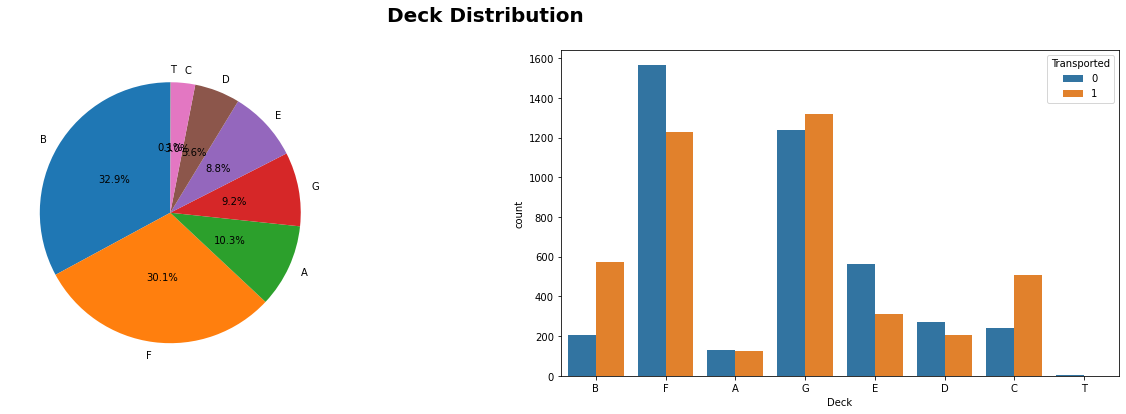

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(22,6))
fig.suptitle('Deck Distribution', size = 20, weight='bold')

sizes = (df_base_titanic['Deck'].value_counts())

labels = df_base_titanic['Deck'].dropna().unique()
 

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.1f%%', pctdistance=0.5,textprops={'fontsize':10})
sns.countplot(x='Deck', data=df_base_titanic, hue='Transported', ax=ax[1])

<AxesSubplot:xlabel='Side', ylabel='count'>

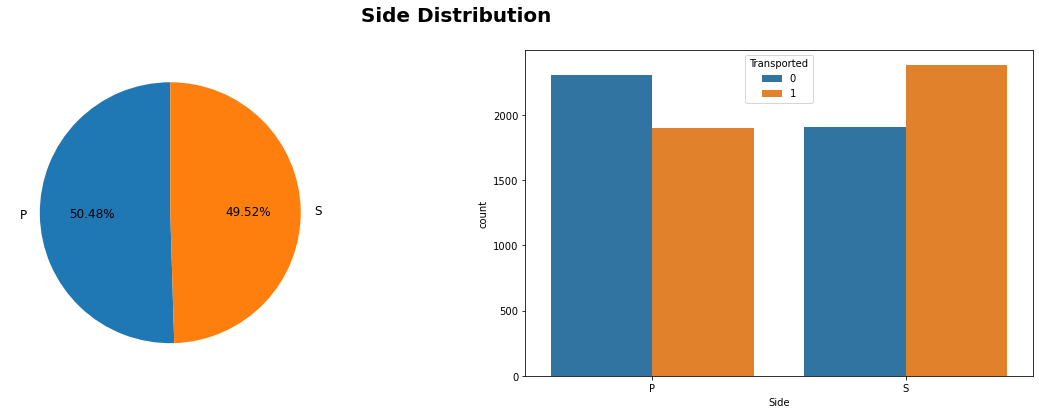

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Side Distribution', size = 20, weight='bold')

sizes = df_base_titanic['Side'].value_counts()

labels = df_base_titanic['Side'].dropna().unique()
 

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Side', data=df_base_titanic, hue='Transported', ax=ax[1])

#4 Destination

In [31]:
df_base_titanic.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

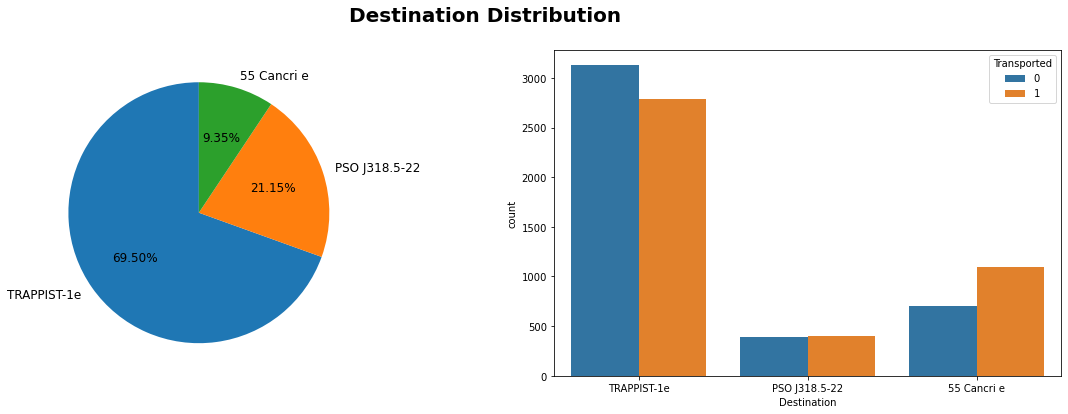

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Destination Distribution', size = 20, weight='bold')

sizes = df_base_titanic['Destination'].value_counts()

labels = df_base_titanic['Destination'].dropna().unique()

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=df_base_titanic, hue='Transported', ax=ax[1])

In [33]:
df_base_titanic.Destination = most_imputer.fit_transform(df_base_titanic[['Destination']])
df_base_test.Destination = most_imputer.fit_transform(df_base_test[['Destination']])

#5 VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

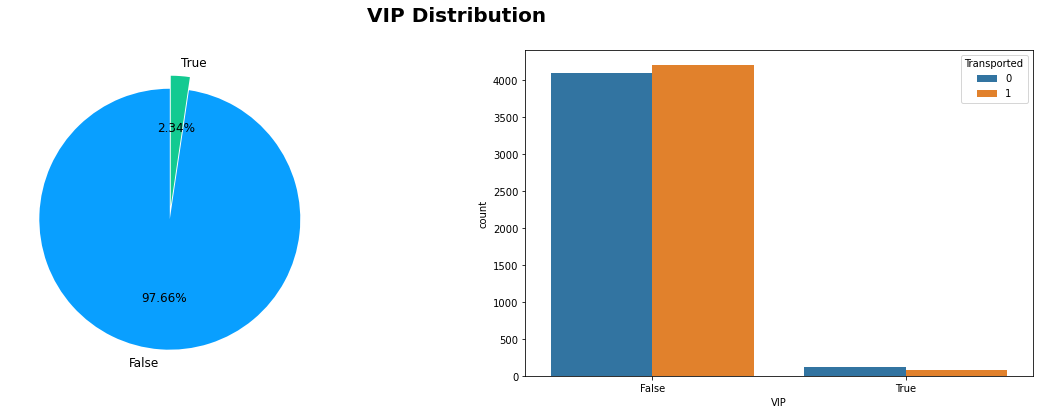

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VIP Distribution', size = 20, weight='bold')

sizes = (df_base_titanic['VIP'].value_counts())

labels = df_base_titanic['VIP'].dropna().unique()
colors = ['#099FFF',  '#13CA91' ]
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=df_base_titanic, hue='Transported', ax=ax[1])

1 - The vast majority of passengers were not in the VIP category
2 - Little difference in probability of being transported to those who are and are not VIPs

In [35]:
df_base_titanic.VIP = most_imputer.fit_transform(df_base_titanic[['VIP']])
df_base_test.VIP = most_imputer.fit_transform(df_base_test[['VIP']])

In [36]:
df_base_titanic['VIP'] = np.where(df_base_titanic['VIP'] == True, 1, 0)
df_base_test['VIP'] = np.where(df_base_test['VIP'] == True, 1, 0)

#6 PassengerId

In [37]:
def create_group_id(passenger_id):
    splitted_id = passenger_id.split("_")
    group_id = splitted_id[1]
    return group_id

In [38]:
df_base_titanic["group_id"] = df_base_titanic["PassengerId"].apply(create_group_id)
df_base_titanic["group_id"] = df_base_titanic["group_id"].astype(int)

In [39]:
df_base_test["group_id"] = df_base_test["PassengerId"].apply(create_group_id)
df_base_test["group_id"] = df_base_test["group_id"].astype(int)

### handling numeric variables with fit_transform

In [40]:
# Applying SimpleImputer to fill the NaN in numeric variables
df_base_titanic.Age =  most_imputer.fit_transform(df_base_titanic[['Age']])
df_base_titanic.RoomService =  most_imputer.fit_transform(df_base_titanic[['RoomService']])
df_base_titanic.FoodCourt =  most_imputer.fit_transform(df_base_titanic[['FoodCourt']])
df_base_titanic.ShoppingMall =  most_imputer.fit_transform(df_base_titanic[['ShoppingMall']])
df_base_titanic.Spa =  most_imputer.fit_transform(df_base_titanic[['Spa']])
df_base_titanic.VRDeck =  most_imputer.fit_transform(df_base_titanic[['VRDeck']])


df_base_test.Age =  most_imputer.fit_transform(df_base_test[['Age']])
df_base_test.RoomService =  most_imputer.fit_transform(df_base_test[['RoomService']])
df_base_test.FoodCourt =  most_imputer.fit_transform(df_base_test[['FoodCourt']])
df_base_test.ShoppingMall =  most_imputer.fit_transform(df_base_test[['ShoppingMall']])
df_base_test.Spa =  most_imputer.fit_transform(df_base_test[['Spa']])
df_base_test.VRDeck =  most_imputer.fit_transform(df_base_test[['VRDeck']])

In [41]:
df_base_titanic = pd.get_dummies(df_base_titanic , columns = ['HomePlanet' , 'Destination' , 'Deck' , 'Side'])
df_base_test = pd.get_dummies(df_base_test , columns = ['HomePlanet' , 'Destination' , 'Deck' , 'Side'])


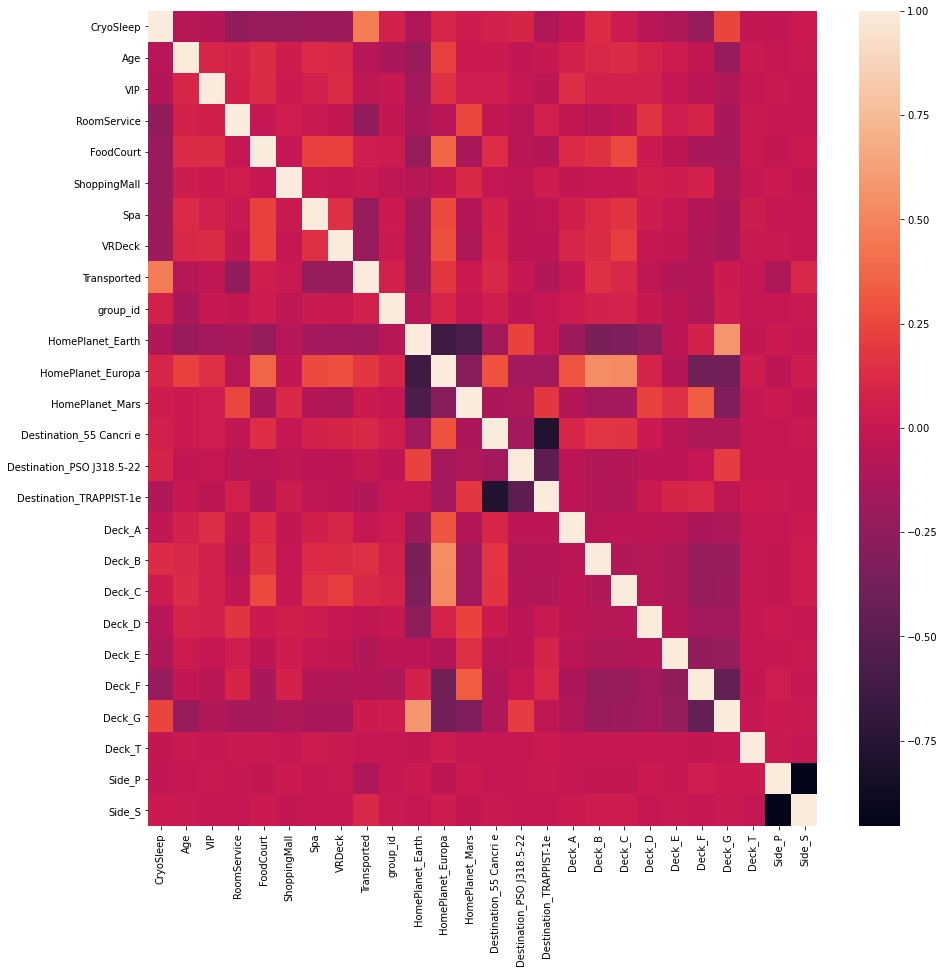

In [42]:
corr = df_base_titanic.corr()
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [43]:
df_base_titanic.drop(['PassengerId' , 'Num'] , axis =1 , inplace = True)

In [44]:
df_base_test.drop(['Name'] , axis =1 , inplace = True)
df_base_titanic.drop(['Name'] , axis =1 , inplace = True)


In [45]:
df_base_test.drop(['Num'] , axis =1 , inplace = True)

### Train and Test Division 

In [46]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [47]:
df_train, df_test = train_test_split(df_base_titanic,
                                         test_size = 0.5 ,
                                         random_state = 0)

In [48]:
X_train , y_train = df_train.drop('Transported' , axis=1) , df_train['Transported']
X_test , y_test = df_test.drop('Transported' , axis=1) , df_test['Transported']

In [49]:
MinMaxScaler().fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [ ]:
X_train[['Age' , 'RoomService' , 'FoodCourt' , 'ShoppingMall' , 'Spa', 'VRDeck']] =  MinMaxScaler().fit_transform(X_train[['Age' , 
                                                                                                                            'RoomService' , 
                                                                                                                            'FoodCourt' , 
                                                                                                                            'ShoppingMall',
                                                                                                                            'Spa',
                                                                                                                            'VRDeck']])

Testing some models

In [54]:
clf = DecisionTreeClassifier(criterion="gini")

In [55]:
model1 = clf.fit(X_train, y_train)

In [56]:
allScores = cross_val_score(clf, X_train, y_train , cv=10)
allScores.mean() 

0.733317442661158

In [57]:
 y_pred = clf.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred, average="macro"),4)) 

f1_score 0.732
precision_score 0.7321
recall_score 0.732


In [58]:
data = pd.DataFrame(clf.feature_importances_,index=list(X_train.columns)).reset_index()
importancia = pd.DataFrame(data)
importancia = importancia.rename({0: 'importance%'}, axis = 1)
importancia = importancia.rename({'index': 'features'}, axis = 1)

importancia.sort_values(by='importance%' , ascending = False)

,features,importance%
0,CryoSleep,0.242418
1,Age,0.177069
4,FoodCourt,0.094383
7,VRDeck,0.077929
3,RoomService,0.076047
6,Spa,0.074284
5,ShoppingMall,0.069156
8,group_id,0.040147
9,HomePlanet_Earth,0.039908
19,Deck_E,0.019237


In [59]:
#RandomForestClassifier

In [60]:
clf_2 = RandomForestClassifier(max_depth=24) 

In [61]:
model2 = clf_2.fit(X_train, y_train)

In [62]:
allScores = cross_val_score(clf_2, X_train, y_train , cv=10)
allScores.mean() 

0.7887732401080566

In [63]:
y_pred2 = clf_2.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred2, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred2, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred2, average="macro"),4)) 

f1_score 0.7847
precision_score 0.7863
recall_score 0.7851


In [64]:
#KNeighborsClassifier() 

In [65]:
clf_3 = KNeighborsClassifier() 

In [66]:
model3 = clf_3.fit(X_train, y_train)

In [67]:
allScores = cross_val_score(clf_3, X_train, y_train , cv=10)
allScores.mean()

0.7744991789819375

In [68]:
y_pred3 = clf_3.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred3, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred3, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred3, average="macro"),4)) 

f1_score 0.7696
precision_score 0.77
recall_score 0.7697


In [69]:
#LogisticRegression

In [70]:
clf_4 = LogisticRegression(max_iter=5000,  random_state=123)

In [71]:
model4 = clf_4.fit(X_train, y_train)

In [72]:
allScores = cross_val_score(clf_4, X_train, y_train , cv=10)
allScores.mean() # tomamos a média do score

0.7929169977223369

In [73]:
y_pred4 = clf_4.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred4, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred4, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred4, average="macro"),4)) 

f1_score 0.7896
precision_score 0.7916
recall_score 0.7898


In [74]:
# Best Model : Random Forest

In [75]:
#Submission

In [214]:
df_base_test1 = df_base_test.copy()

In [215]:
df_base_test1 = df_base_test1.drop(['PassengerId'], axis=1)

In [216]:
predictions = model2.predict(df_base_test1)

In [217]:
output = pd.DataFrame({'PassengerId': df_base_test.PassengerId, 
                       'Transported': predictions})

In [218]:
output['Transported'] = np.where(output['Transported'] == 1, True, False)

In [219]:
output.to_csv('submission.csv', index=False)